##Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report
import time

import warnings
warnings.filterwarnings('ignore')

##Dataset Overview

In [2]:
#Overview of the credit card churn rate dataset.
df = pd.read_csv('/content/BankChurners.csv')
print(f'The data has {df.shape[0]} rows and {df.shape[1]}columns.')
df.head()

The data has 10127 rows and 23columns.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Columns of the dataset
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [4]:
# Descriptive statistics for numerical variables
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
# Descriptive statistics for categorical variables
df.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [6]:
# Checking for duplicate rows and customer id
duplicate_sum = df.duplicated().sum()
duplicate_client_sum = df.duplicated(subset=['CLIENTNUM']).sum()
print("Duplicate rows:", duplicate_sum)
print("Duplicate CLIENTNUM:", duplicate_client_sum)

Duplicate rows: 0
Duplicate CLIENTNUM: 0


- Given the descriptive statistics above (both numerical and categorical variables) and inspection on duplicate rows of observation, we ensure that there is no missing value in our dataset. It is a complete raw dataset for us to analyze.

##Datapreprocessing

In [7]:
# dropping irrelevant columns for analysis
clean_df = df.drop('CLIENTNUM', axis=1)

# turning categorical variables into numercial values for modeling purpose
label_encoder = LabelEncoder()
columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for column in columns:
    clean_df[column] = label_encoder.fit_transform(clean_df[column])

# differentiate features X and target y, and rescale X for linear, logistic and models with penalty
X = clean_df.iloc[:, 1:20]
X = StandardScaler().fit_transform(X)
y = clean_df.iloc[:, 0]
print(X.shape, y.shape)

(10127, 19) (10127,)


In [8]:
# benchmark for our prediction
print("Percentage of customer staying:", round(y.mean(), 2))
print("Percentage of customer leaving:", round(1.0 - y.mean(), 2))

Percentage of customer staying: 0.84
Percentage of customer leaving: 0.16


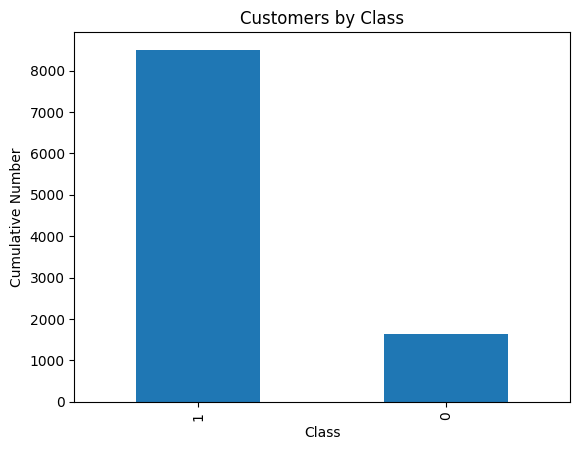

In [9]:
# bar chart for target, y, we observe that the dataset is imbalanced in two classes
# 0 represents customers that leave; 1 means customers that stay
counts = clean_df['Attrition_Flag'].value_counts()
counts .plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Cumulative Number')
plt.title('Customers by Class')
plt.show()

- The above bar chart shows observations of our target y are imbalanced. It keeps us aware that we should use stratified k-fold cross validation throughout our analysis.

##Prediction Model
<br>1. Linear Regression (Benchmark Model)

In [10]:
lr = LinearRegression()
nmc = 250
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
stratified_cv = StratifiedKFold(n_splits=nmc)

start_time = time.time()
CVInfo = cross_validate(lr, X_train, y_train, cv=stratified_cv, return_train_score=True)
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
processing_time = time.time() - start_time

print("Train score:", np.mean(CVInfo['train_score']))
print("Test score:", np.mean(CVInfo['test_score']))
print("Processing time:", processing_time, "seconds")

Train score: 0.3766166731866535
Test score: 0.3727645378724285
Processing time: 9.066588163375854 seconds


In [11]:
threshold = 0.5
yhat_5 = [1 if value >= threshold else 0 for value in yhat]
cm = confusion_matrix(y_test, yhat_5)
cr = classification_report(y_test, yhat_5)
print(cm)
print(cr)

[[ 179  215]
 [  46 2092]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58       394
           1       0.91      0.98      0.94      2138

    accuracy                           0.90      2532
   macro avg       0.85      0.72      0.76      2532
weighted avg       0.89      0.90      0.88      2532



Testing Across Threshold

In [12]:
threshold = 0.7
yhat_7 = [1 if value >= threshold else 0 for value in yhat]
cm = confusion_matrix(y_test, yhat_7)
cr = classification_report(y_test, yhat_7)
print(cm)
print(cr)

[[ 331   63]
 [ 307 1831]]
              precision    recall  f1-score   support

           0       0.52      0.84      0.64       394
           1       0.97      0.86      0.91      2138

    accuracy                           0.85      2532
   macro avg       0.74      0.85      0.77      2532
weighted avg       0.90      0.85      0.87      2532



In [13]:
threshold = 0.3
yhat_3 = [1 if value >= threshold else 0 for value in yhat]
cm = confusion_matrix(y_test, yhat_3)
cr = classification_report(y_test, yhat_3)
print(cm)
print(cr)

[[  36  358]
 [   1 2137]]
              precision    recall  f1-score   support

           0       0.97      0.09      0.17       394
           1       0.86      1.00      0.92      2138

    accuracy                           0.86      2532
   macro avg       0.91      0.55      0.54      2532
weighted avg       0.87      0.86      0.80      2532



<br>2. Logistic Regression Model with Ridge Penalty

In [14]:
lr = LogisticRegression(penalty='l2')
params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 2]}
stratified_cv = StratifiedKFold(n_splits=nmc)

start_time = time.time()
grid_search = GridSearchCV(lr, params, cv=stratified_cv, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
yhat = grid_search.best_estimator_.predict(X_test)
processing_time = time.time() - start_time

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'mean_train_score', 'param_C']])
print("Mean training score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_train_score']))
print("Mean test score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_test_score']))
print("Processing time:", processing_time, "seconds")

   rank_test_score  mean_test_score  mean_train_score param_C
0                9         0.837643          0.837656  0.0001
1                8         0.868998          0.869037   0.001
2                7         0.899746          0.900193    0.01
3                6         0.903695          0.904463    0.05
4                4         0.903974          0.904382     0.1
5                5         0.903703          0.905015    0.25
6                3         0.903978          0.904992     0.5
7                1         0.904245          0.905047       1
8                2         0.904241          0.905044       2
Mean training score: 0.9050474464389883
Mean test score: 0.9042451612903226
Processing time: 58.41149306297302 seconds


In [15]:
cm = confusion_matrix(y_test, yhat)
cr = classification_report(y_test, yhat)
print(cm)
print(cr)

[[ 222  172]
 [  76 2062]]
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       394
           1       0.92      0.96      0.94      2138

    accuracy                           0.90      2532
   macro avg       0.83      0.76      0.79      2532
weighted avg       0.90      0.90      0.90      2532



<br>3. Naive Bayes Model

In [16]:
nb = GaussianNB()

start_time = time.time()
CVInfo = cross_validate(nb, X_train, y_train, cv=stratified_cv, return_train_score=True)
nb.fit(X_train, y_train)
yhat = nb.predict(X_test)
processing_time = time.time() - start_time

print("Train score:", np.mean(CVInfo['train_score']))
print("Test score:", np.mean(CVInfo['test_score']))
print("Processing time:", processing_time, "seconds")

Train score: 0.8853922619511564
Test score: 0.8842322580645161
Processing time: 3.7586474418640137 seconds


In [17]:
cm = confusion_matrix(y_test, yhat)
cr = classification_report(y_test, yhat)
print(cm)
print(cr)

[[ 269  125]
 [ 157 1981]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       394
           1       0.94      0.93      0.93      2138

    accuracy                           0.89      2532
   macro avg       0.79      0.80      0.79      2532
weighted avg       0.89      0.89      0.89      2532



<br>4. Nonlinear Support Vector Machine

In [18]:
svm = SVC(kernel='rbf')
params = {'C': [0.001, 0.05, 0.1, 1, 5],
          'gamma': [0.001, 0.05, 0.1, 1, 10]}
stratified_cv = StratifiedKFold(n_splits=5)

start_time = time.time()
grid_search = GridSearchCV(svm, params, cv=stratified_cv, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
yhat = grid_search.best_estimator_.predict(X_test)
processing_time = time.time() - start_time

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'mean_train_score', 'param_C', 'param_gamma']])
print("Mean training score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_train_score']))
print("Mean test score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_test_score']))
print("Processing time:", processing_time, "seconds")

    rank_test_score  mean_test_score  mean_train_score param_C param_gamma
0                13         0.837656          0.837656   0.001       0.001
1                13         0.837656          0.837656   0.001        0.05
2                13         0.837656          0.837656   0.001         0.1
3                13         0.837656          0.837656   0.001           1
4                13         0.837656          0.837656   0.001          10
5                13         0.837656          0.837656    0.05       0.001
6                 9         0.885188          0.886570    0.05        0.05
7                10         0.870704          0.872943    0.05         0.1
8                13         0.837656          0.837656    0.05           1
9                13         0.837656          0.837656    0.05          10
10               13         0.837656          0.837656     0.1       0.001
11                6         0.896643          0.898716     0.1        0.05
12                8      

In [19]:
cm = confusion_matrix(y_test, yhat)
cr = classification_report(y_test, yhat)
print(cm)
print(cr)

[[ 288  106]
 [  58 2080]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       394
           1       0.95      0.97      0.96      2138

    accuracy                           0.94      2532
   macro avg       0.89      0.85      0.87      2532
weighted avg       0.93      0.94      0.93      2532



<br>5. Random Forest

In [20]:
rf = RandomForestClassifier()

start_time = time.time()
params = {'max_depth': [2,5,10], 'max_features': [3,5,10], 'n_estimators': [10,20]}
grid_search = GridSearchCV(rf, params, cv=stratified_cv, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
yhat = grid_search.best_estimator_.predict(X_test)
processing_time = time.time() - start_time

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_train_score', 'mean_test_score', 'param_max_depth', 'param_max_features','param_n_estimators']])
print("Mean training score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_train_score']))
print("Mean test score:", np.mean(results[results['params'] == grid_search.best_params_]['mean_test_score']))
print("Processing time:", processing_time, "seconds")

    rank_test_score  mean_train_score  mean_test_score param_max_depth  \
0                17          0.854510         0.852666               2   
1                18          0.849243         0.846873               2   
2                16          0.866952         0.865833               2   
3                15          0.875247         0.874786               2   
4                14          0.886504         0.883608               2   
5                13          0.887196         0.886636               2   
6                12          0.912574         0.905464               5   
7                11          0.917479         0.909414               5   
8                 9          0.932785         0.922186               5   
9                10          0.931271         0.921132               5   
10                8          0.949111         0.937986               5   
11                7          0.950132         0.938644               5   
12                6          0.978407 

In [21]:
cm = confusion_matrix(y_test, yhat)
cr = classification_report(y_test, yhat)
print(cm)
print(cr)

[[ 327   67]
 [  37 2101]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       394
           1       0.97      0.98      0.98      2138

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.96      0.96      0.96      2532



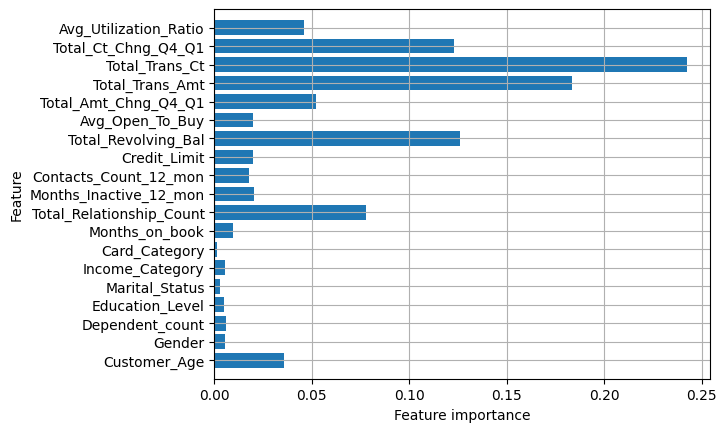

In [22]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clean_df.iloc[:, 1:20].columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(grid_search.best_estimator_)
plt.grid()

## Appendix
- As we found, in the original dataset, the last two features, "Naive_Bayes_Classifier_Attrition_Flag......mon_1", and "Naive_Bayes_Classifier_Attrition_Flag......mon_2" are probabilities that are already fine-tuned by some other guys in predicting the target y, whether a customer is leaving(0) or staying(1). Putting these two variables in our algorithm for analysis will make this whole final project task too simply, as linear regression model with threshold level 0.5 can easily classify two classes perfectly. Therefore, in the above sections of our final report, we drop these two columns.

<br>1. Linear Regression Model

In [23]:
# differentiate features X and target y, and rescale X for linear, logistic and models with penalty
X_corr = clean_df.iloc[:, 1:22]
X_corr = StandardScaler().fit_transform(X_corr)
y_corr = clean_df.iloc[:, 0]
print(X_corr.shape, y_corr.shape)

(10127, 21) (10127,)


In [24]:
lr = LinearRegression()
nmc = 250
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr, y_corr, test_size=0.25, random_state=10)
stratified_cv = StratifiedKFold(n_splits=nmc)

start_time = time.time()
CVInfo = cross_validate(lr, X_corr_train, y_corr_train, cv=stratified_cv, return_train_score=True)
lr.fit(X_corr_train, y_corr_train)
yhat = lr.predict(X_corr_test)
processing_time = time.time() - start_time

print("Train score:", np.mean(CVInfo['train_score']))
print("Test score:", np.mean(CVInfo['test_score']))
print("Processing time:", processing_time, "seconds")

Train score: 0.9999811250019952
Test score: 0.9999809756967575
Processing time: 5.347731828689575 seconds


In [25]:
threshold = 0.5
yhat_5 = [1 if value >= threshold else 0 for value in yhat]
cm = confusion_matrix(y_corr_test, yhat_5)
cr = classification_report(y_corr_test, yhat_5)
print(cm)
print(cr)

[[ 394    0]
 [   0 2138]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00      2138

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532



2. Logistic Regression Model

In [26]:
lr = LogisticRegression(penalty='l2')
params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 2]}
stratified_cv = StratifiedKFold(n_splits=nmc)

start_time = time.time()
grid_search = GridSearchCV(lr, params, cv=stratified_cv, return_train_score=True, n_jobs=-1)
grid_search.fit(X_corr_train, y_corr_train)
yhat = grid_search.best_estimator_.predict(X_corr_test)
processing_time = time.time() - start_time

results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score', 'mean_test_score', 'mean_train_score', 'param_C']])
print("Processing time:", processing_time, "seconds")

   rank_test_score  mean_test_score  mean_train_score param_C
0                9         0.837643          0.837656  0.0001
1                1         1.000000          1.000000   0.001
2                1         1.000000          1.000000    0.01
3                1         1.000000          1.000000    0.05
4                1         1.000000          1.000000     0.1
5                1         1.000000          1.000000    0.25
6                1         1.000000          1.000000     0.5
7                1         1.000000          1.000000       1
8                1         1.000000          1.000000       2
Processing time: 37.78465509414673 seconds


In [27]:
cm = confusion_matrix(y_corr_test, yhat)
cr = classification_report(y_corr_test, yhat)
print(cm)
print(cr)

[[ 394    0]
 [   0 2138]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00      2138

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532



3. Correlations between Target, y, and Two Deterministic Features

In [28]:
corr1 = clean_df.iloc[:, 0].corr(clean_df.iloc[:, -1])
print("Correlation between target, y and one of the deterministic features:\n", corr1)

Correlation between target, y and one of the deterministic features:
 0.9999887961571856


In [29]:
corr2 = clean_df.iloc[:, -1].corr(clean_df.iloc[:, -2])
print("Correlation between two deterministic features:\n", corr2)

Correlation between two deterministic features:
 -0.9999999999689081
